<a href="https://colab.research.google.com/github/NicoleNisbett/IC2S2/blob/main/Deep_Learning_with_Pytorch_Tutorial_NDehmamy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab
This environment is the Google colab, which uses [Jupyter Notebooks](https://jupyter.org/). 
There is one python instance (kernel) running in the background. 
The code is written in cells. 
Each can be run separately while sharing the same python kernel.  
Use `Shift+Enter` to run each cell. 

## Resources Used in this Tutorial 

__Elvis Saravia, Meta AI (prev. Facebook AI)__
https://github.com/omarsar/pytorch_notebooks 
https://medium.com/dair-ai/a-simple-neural-network-from-scratch-with-pytorch-and-google-colab-c7f3830618e0 

https://colab.research.google.com/drive/1ac0K9_aa46c77XEeYtaMAfSOfmH1Bl9L#scrollTo=4-o4w9vpPHZz


__Prof. Soheil Feizi, Computer Science Department, University of Maryland__
Foundations of Deep Learning
https://colab.research.google.com/drive/1ElEaLiW6PGyXObYGAdULk8ArGd8nLU7p?usp=sharing#scrollTo=G9lMVNvWVKYq

Course webpage: http://www.cs.umd.edu/class/fall2021/cmsc828W/ 
Video lectures: https://youtube.com/playlist?list=PLHgjs9ncvHi80UCSlSvQe-TK_uOyDv_Jf 



In [ ]:
%pylab inline

# loads packages for numerical (numpy) and plotting (matplotlib) operations.  
# to run: Shift+enter

Populating the interactive namespace from numpy and matplotlib


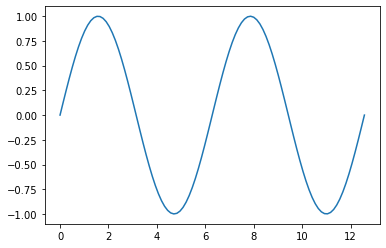

In [ ]:
t = linspace(0, 4*pi, 100)
plot(t, sin(t))

In [ ]:

type(t)

numpy.ndarray

In [ ]:
t.shape 

(100,)

In [ ]:
type(t)

numpy.ndarray

In [ ]:
# pytorch 
import torch

## print out the pytorch version used
torch.__version__

'1.11.0+cu113'

In [ ]:
## configuration to detect cuda or cpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print (device)

cpu


# Tensors in pytorch
The basic object that pytorch uses for computation is `torch.tensor`, which is a __multidimensional array__. 

In [ ]:
# list
x = [1,2]
# x = list([1,2])
x

[1, 2]

In [ ]:
x = torch.tensor([1,3])

# to see the value of a variable, just type it in the last line of the cell
x

tensor([1, 3])

# Linear Regression Example

## Explanatory Variable

In [ ]:
# number of data points
n = 200

# dimensionality of the data
d = 1

# random standard normal distributed numbers 
x = torch.randn(n,d) 

# print the first 5 values
x[:5]

tensor([[ 0.4477],
        [ 3.1240],
        [ 0.2638],
        [-1.3532],
        [ 0.8446]])

In [ ]:
x.shape

torch.Size([200, 1])

## Dependent variable 

In [ ]:
w, b = 3, 1

y = w*x + b 
y.shape

torch.Size([200, 1])

# The Neural Network

![alt text](https://drive.google.com/uc?export=view&id=1Lpi4VPBfAV3JkOLopcsGK4L8dyxmPF1b)


# Building a Pytorch Model
Linear regression can be implemented using the simplest neural network (NN) module in pytorch. 
Recall that a fully-connected NN performs 

$\tilde{y} = \sigma(Wx+b)$

The pytorch module `torch.nn` contains all its NN submodules. 
The fully-connected NN is called `torch.nn.Linear`. 

To do linear regression, we set the activation function $\sigma(\cdot)$ to be linear, meaning $\sigma(x)=x$. 

In [ ]:
# make a fully-connected neural network layer
fc = torch.nn.Linear(in_features=d, out_features= d) 

In [ ]:

fc

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
type(fc(x))

torch.Tensor

In [ ]:
# to pass data through the layer call the layer with the data as input
fc(x)[:3]

tensor([[-1.1243],
        [-2.5649],
        [-1.0253]], grad_fn=<SliceBackward0>)

In [ ]:

for i in range(3):
  print(i)

0
1
2


In [ ]:
list(range(3))

[0, 1, 2]

In [ ]:
fc.parameters()

<generator object Module.parameters at 0x7f7567f09e50>

In [ ]:
list(fc.parameters())

[Parameter containing:
 tensor([[0.0715]], requires_grad=True), Parameter containing:
 tensor([0.8311], requires_grad=True)]

In [ ]:

torch.norm(fc(x) - y)**2 / (n)

tensor(17.2610, grad_fn=<DivBackward0>)

# Calculating the Error
Pytorch has implementations of most commonly used loss functions in the `torch.nn` module, including 
the mean square error (MSE) 

In [ ]:
# create an instance of the loss function 
mse = torch.nn.MSELoss()

In [ ]:
# Evaluate the loss between the predicted values and actual values of the dependent variable
y_pred = fc(x)


loss = mse(y_pred, y)

# grad_fn: related to Automatic Differentiation
loss


tensor(17.2610, grad_fn=<MseLossBackward0>)

## Minimizing the Loss
To find the parameters $w,b$ we can minimize the MSE loss 
$$L={1\over n} \|y-y_{pred}\|^2$$
Since this is a convex loss, performing gradient descent for $w,b$ is guaranteed to approach optimal values. 

## Gradient Descent or Error Backpropagation 
GD at time step $t$ follows the update rule

$$w_t = w_{t-1} - \epsilon {\partial L \over \partial w_{t-1}} $$
where $\epsilon$ is the "learning rate". 
The following is how gradient descent is done in pytorch. 
We will explain the steps after this. 

## Optimizer
The optimizer runs the function to calculate gradients with respect to all parameters of the machine learning model. 
In the case of Linear regression, the "model" is the fully-connected layer `fc`. 

In [ ]:
## optimizer algorithm
# One of the simplest optimizers is Stochastic Gradient Descent, which approximates gradients using minibatches of data.   
optimizer = torch.optim.SGD(fc.parameters(), # you need to pass the "model" parameters to the optimizer, so it knows which params need gradients 
                            lr=0.01 # the learning rate
                            )

## Training the Neural Network Model
We have all the components we need to train our model. Below is the code used to train our model. 

In simple terms, we train the model by feeding it the input and output pairs for a couple of rounds (i.e., `epoch`). After a series of forward and backward steps, the model somewhat learns the relationship between x and y values. This is notable by the decrease in the computed `loss`. For a more detailed explanation of this code check out this [tutorial](https://medium.com/dair-ai/a-simple-neural-network-from-scratch-with-pytorch-and-google-colab-c7f3830618e0). 

In [ ]:
w_1, b_1 = list(fc.parameters())

In [ ]:
w_1 

Parameter containing:
tensor([[-0.5383]], requires_grad=True)

In [ ]:

b_1

Parameter containing:
tensor([-0.8834], requires_grad=True)

In [ ]:
w_1.grad

In [ ]:
w_1, b_1 = list(fc.parameters())

# Training via gradient descent
epochs = 100
for i in range(epochs):
    ## forward
    # pass x through the fc layer
    y_pred = fc(x)
    # calculate loss 
    loss = mse(y_pred, y)

    # reset the gradients calculated by the optimizer
    optimizer.zero_grad()

    ## backward + update model params 
    # calculating the gradients is done by calling the "backward" method (named so because of "error backpropagation")
    loss.backward()
    # to perform one GD step `w[t] = w[t-1] - eps*grad(L,w)` call:    
    optimizer.step()
    
    print('Epoch: %d | Loss: %.4f | w: %.3f, b: %.3f' %(i, loss.detach().item(), w_1.detach().item(), b_1.detach().item()  ))
    # (read about string formatting in python) 

Epoch: 0 | Loss: 0.2247 | w: 2.616, b: 0.769
Epoch: 1 | Loss: 0.2152 | w: 2.625, b: 0.773
Epoch: 2 | Loss: 0.2060 | w: 2.633, b: 0.778
Epoch: 3 | Loss: 0.1973 | w: 2.641, b: 0.783
Epoch: 4 | Loss: 0.1889 | w: 2.649, b: 0.787
Epoch: 5 | Loss: 0.1809 | w: 2.656, b: 0.792
Epoch: 6 | Loss: 0.1732 | w: 2.664, b: 0.796
Epoch: 7 | Loss: 0.1659 | w: 2.671, b: 0.800
Epoch: 8 | Loss: 0.1588 | w: 2.678, b: 0.804
Epoch: 9 | Loss: 0.1521 | w: 2.685, b: 0.808
Epoch: 10 | Loss: 0.1456 | w: 2.692, b: 0.812
Epoch: 11 | Loss: 0.1395 | w: 2.699, b: 0.816
Epoch: 12 | Loss: 0.1335 | w: 2.705, b: 0.820
Epoch: 13 | Loss: 0.1279 | w: 2.712, b: 0.823
Epoch: 14 | Loss: 0.1225 | w: 2.718, b: 0.827
Epoch: 15 | Loss: 0.1173 | w: 2.724, b: 0.831
Epoch: 16 | Loss: 0.1123 | w: 2.730, b: 0.834
Epoch: 17 | Loss: 0.1075 | w: 2.736, b: 0.837
Epoch: 18 | Loss: 0.1030 | w: 2.742, b: 0.841
Epoch: 19 | Loss: 0.0986 | w: 2.747, b: 0.844
Epoch: 20 | Loss: 0.0944 | w: 2.753, b: 0.847
Epoch: 21 | Loss: 0.0904 | w: 2.758, b: 0.85

## Automatic stopping criteria
if the loss doesn't change more than a given threshold, stop training

In [ ]:
history = [100]
threshold = 1e-3

w_1, b_1 = list(fc.parameters())

epochs = 1000
for i in range(epochs):
    y_pred = fc(x)
    loss = mse(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    l = loss.detach().item()
    history += [l]
    if np.abs(history[-2]-history[-1]) < threshold:
      break

    #print('Epoch: %d | Loss: %.4f | w: %.3f, b: %.3f' %(i, loss.detach().item(), w_1.detach().item(), b_1.detach().item()  ))
    # (read about string formatting in python) 


134

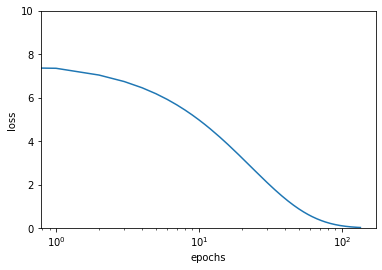

In [ ]:
plot(history)
ylim(0,10)
ylabel('loss')
xlabel('epochs')
xscale('log')
i

In [ ]:
list(fc.parameters())

[Parameter containing:
 tensor([[2.8862]], requires_grad=True), Parameter containing:
 tensor([0.9154], requires_grad=True)]

In [ ]:
optimizer.zero_grad()
w_1, w_1.grad

(Parameter containing:
 tensor([[2.5097]], requires_grad=True), tensor([[0.]]))

As we see, the parameters of the trained layer approach the ground truth values of $w,b$. 

# Building the Model by Hand 
In many cases you may need customized layers or models. 
Pytorch allows you to build such models using the `torch.nn.Module` module. 

In [ ]:
# For brevity, use the alias `nn` for 
# pytorch Neural Networks package 
import torch.nn as nn 

In [ ]:
def fun(a):
  return a**2

fun( 3)

9

In [ ]:
class tree:
  center = 4
  def __init__(self, # refers to the object itself
               ):
    self.left = None 
    self.right = None 

  def str(self):
    print( self.left, self.right)
    


In [ ]:
t = tree()
t.left = 2
t.right = 5

t.str()

2 5


In [ ]:
class birch(tree):
  def __init__(self):
    super(birch, self).__init__()

  def leaf(self):
    print('hi')

In [ ]:
b1 = birch()

In [ ]:
b1.left

In [ ]:
b1.str()

None None


In [ ]:
t1 = tree()
t1.left = 10
t1.right = 2

t1.left, t1.right

(10, 2)

In [ ]:

t1.str()

10 2


In [ ]:
t2 = tree()
t2.left = 5
t2.right = 3

t1.left, t2.left

(10, 5)

In [ ]:
t1.center

4

In [ ]:
t2.center = 20

In [ ]:
t1.center 

4

In [ ]:
# build a pytorch linear layer from scratch
# (simplified from pytorch source)

class SimpleLinear(nn.Module):
    def __init__(self, in_features: int, out_features: int, bias: bool = True,):
        # run this line so tht pytorch does the extra steps required to make this a torch module 
        super(SimpleLinear, self).__init__()

        self.in_features = in_features
        self.out_features = out_features

        # define parameters
        w = torch.empty((out_features, in_features))
        self.weight = nn.Parameter(w)
        # initialize weights to give them random values 
        nn.init.normal_(self.weight) 

        if bias:
            b = torch.empty(out_features)
            self.bias = nn.Parameter(b)
            nn.init.normal_(self.bias)
        else:
            self.register_parameter('bias', None)
        
    def forward(self, input: torch.Tensor) -> torch.Tensor:
        # transpose weights 
        w_T = self.weight.t()
        # (@ is matrix product)
        # x: (num data, in_feat)
        # x W^T + b
        return input @ w_T + self.bias
        
        #return F.linear(input, self.weight, self.bias)

    def extra_repr(self) -> str:
        # used when printing
        return 'in_features={}, out_features={}, bias={}'.format(
            self.in_features, self.out_features, self.bias is not None
        )



In [ ]:
fc_simple = SimpleLinear(1,1)

mse = torch.nn.MSELoss()
optimizer = torch.optim.SGD( fc_simple.parameters(), lr=0.01 )

In [ ]:
# GD
for i in range(50):
    y_pred = fc_simple(x)
    loss = mse(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print('Epoch: %d | Loss: %.4f' %(i, loss.detach().item()))

Epoch: 0 | Loss: 15.1839
Epoch: 1 | Loss: 14.5349
Epoch: 2 | Loss: 13.9137
Epoch: 3 | Loss: 13.3190
Epoch: 4 | Loss: 12.7497
Epoch: 5 | Loss: 12.2048
Epoch: 6 | Loss: 11.6831
Epoch: 7 | Loss: 11.1838
Epoch: 8 | Loss: 10.7058
Epoch: 9 | Loss: 10.2482
Epoch: 10 | Loss: 9.8102
Epoch: 11 | Loss: 9.3909
Epoch: 12 | Loss: 8.9895
Epoch: 13 | Loss: 8.6053
Epoch: 14 | Loss: 8.2375
Epoch: 15 | Loss: 7.8855
Epoch: 16 | Loss: 7.5485
Epoch: 17 | Loss: 7.2259
Epoch: 18 | Loss: 6.9170
Epoch: 19 | Loss: 6.6214
Epoch: 20 | Loss: 6.3384
Epoch: 21 | Loss: 6.0675
Epoch: 22 | Loss: 5.8082
Epoch: 23 | Loss: 5.5600
Epoch: 24 | Loss: 5.3224
Epoch: 25 | Loss: 5.0949
Epoch: 26 | Loss: 4.8772
Epoch: 27 | Loss: 4.6687
Epoch: 28 | Loss: 4.4692
Epoch: 29 | Loss: 4.2782
Epoch: 30 | Loss: 4.0954
Epoch: 31 | Loss: 3.9204
Epoch: 32 | Loss: 3.7528
Epoch: 33 | Loss: 3.5924
Epoch: 34 | Loss: 3.4389
Epoch: 35 | Loss: 3.2920
Epoch: 36 | Loss: 3.1513
Epoch: 37 | Loss: 3.0166
Epoch: 38 | Loss: 2.8877
Epoch: 39 | Loss: 2.7643


In [ ]:
list(fc_simple.parameters())

[Parameter containing:
 tensor([[2.9117]], requires_grad=True), Parameter containing:
 tensor([1.0157], requires_grad=True)]

# Extra: The Full Source-code for `nn.Linear`
Pytorch is open source (at least the python parts). 
Feel free to consult the source-codes

https://github.com/pytorch/pytorch/blob/master/torch/nn/modules/linear.py 


In [ ]:
# build a pytorch linear layer from scratch
# (borrowed from pytorch source)

class MyLinear(nn.Module):
    r"""Applies a linear transformation to the incoming data: :math:`y = xA^T + b`
    This module supports :ref:`TensorFloat32<tf32_on_ampere>`.
    Args:
        in_features: size of each input sample
        out_features: size of each output sample
        bias: If set to ``False``, the layer will not learn an additive bias.
            Default: ``True``
    Shape:
        - Input: :math:`(*, H_{in})` where :math:`*` means any number of
          dimensions including none and :math:`H_{in} = \text{in\_features}`.
        - Output: :math:`(*, H_{out})` where all but the last dimension
          are the same shape as the input and :math:`H_{out} = \text{out\_features}`.
    Attributes:
        weight: the learnable weights of the module of shape
            :math:`(\text{out\_features}, \text{in\_features})`. The values are
            initialized from :math:`\mathcal{U}(-\sqrt{k}, \sqrt{k})`, where
            :math:`k = \frac{1}{\text{in\_features}}`
        bias:   the learnable bias of the module of shape :math:`(\text{out\_features})`.
                If :attr:`bias` is ``True``, the values are initialized from
                :math:`\mathcal{U}(-\sqrt{k}, \sqrt{k})` where
                :math:`k = \frac{1}{\text{in\_features}}`
    Examples::
        >>> m = nn.Linear(20, 30)
        >>> input = torch.randn(128, 20)
        >>> output = m(input)
        >>> print(output.size())
        torch.Size([128, 30])
    """
    __constants__ = ['in_features', 'out_features']
    in_features: int
    out_features: int
    weight: Tensor

    def __init__(self, in_features: int, out_features: int, bias: bool = True,
                 device=None, dtype=None) -> None:
        factory_kwargs = {'device': device, 'dtype': dtype}
        super(Linear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.empty((out_features, in_features), **factory_kwargs))
        if bias:
            self.bias = Parameter(torch.empty(out_features, **factory_kwargs))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self) -> None:
        # Setting a=sqrt(5) in kaiming_uniform is the same as initializing with
        # uniform(-1/sqrt(in_features), 1/sqrt(in_features)). For details, see
        # https://github.com/pytorch/pytorch/issues/57109
        init.kaiming_uniform_(self.weight, a=math.sqrt(5))
        if self.bias is not None:
            fan_in, _ = init._calculate_fan_in_and_fan_out(self.weight)
            bound = 1 / math.sqrt(fan_in) if fan_in > 0 else 0
            init.uniform_(self.bias, -bound, bound)

    def forward(self, input: Tensor) -> Tensor:
        return F.linear(input, self.weight, self.bias)

    def extra_repr(self) -> str:
        return 'in_features={}, out_features={}, bias={}'.format(
            self.in_features, self.out_features, self.bias is not None
        )




# Exercises
- Add more examples in the input and output tensors. In addition, try to change the dimensions of the data, say by adding an extra value in each array. What needs to be changed to successfully train the network with the new data?
- The model converged really fast, which means it learned the relationship between x and y values after a couple of iterations. Do you think it makes sense to continue training? How would you automate the process of stopping the training after the model loss doesn't subtantially change?
- In our example, we used a single hidden layer. Try to take a look at the PyTorch documentation to figure out what you need to do to get a model with more layers. What happens if you add more hidden layers?
- We did not discuss the learning rate (`lr-0.001`) and the optimizer in great detail. Check out the [PyTorch documentation](https://pytorch.org/docs/stable/optim.html) to learn more about what other optimizers you can use.


# Extra: Under the Hood: A Bit about Gradients 

Let us initialize $x$ with random values between [0,10]. In pytorch "requires_grad" must be set to true if we want to differentiate a variable

In [ ]:
x = torch.randint(0,10,(4,))
x = x.float()
x.requires_grad_(True)
x

tensor([5., 2., 2., 0.], requires_grad=True)

In [ ]:
x.requires_grad, x.requires_grad_

(False, <function Tensor.requires_grad_>)

Next, let's define $y$. Since $x$ is a vector, we are taking the dot product of $x$ and itself in order to obtain a scalar value

In [ ]:
y = 3 * torch.dot(x,x)
y

tensor(99., grad_fn=<MulBackward0>)


To show the importance of using the dot product, if we just try to use the multiplication operator for $x$ and itself, we will get a vector in return

In [ ]:
3*x*x

tensor([75., 12., 12.,  0.], grad_fn=<MulBackward0>)

Next, we can automatically calculate the gradient of $y$ with respect to each component of $x$ by calling the function for backpropagation and printing the gradient

In [ ]:
y.backward()
x.grad

tensor([30., 12., 12.,  0.])

The gradient of the function  $y=3x^T x$  with respect to $x$ should be $6x$. Let us quickly verify that our desired gradient was calculated correctly.

In [ ]:
3*2*x == x.grad

tensor([True, True, True, True])

Since the gradient stored in "x.grad" matches $6x$, we know that our differentiation worked.

# Extra: Defining Custom Loss Functions 

#### Quadratic Loss

In [ ]:
class QuadraticLoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, outputs, target):
        return 0.5 * torch.sum((outputs - target) ** 2)

##### Usage

In [ ]:
loss = QuadraticLoss()
outputs = torch.Tensor([1., 2., 3.])
target = torch.Tensor([2., 1., 0.])
print(loss(outputs, target))

tensor(5.5000)


### Classification

#### 0-1 Loss

In [ ]:
class ZeroOneLoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, outputs, target):
        product = outputs * target
        product[product >= 0] = 0
        product[product < 0] = 1
        return torch.sum(product)

##### Usage

In [ ]:
loss = ZeroOneLoss()
outputs = torch.Tensor([2., -1.5, -0.7])
target = torch.Tensor([1., -1, 1.])
print(loss(outputs, target))

tensor(1.)


#### Hinge Loss

In [ ]:
class HingeLoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, outputs, target):
        product = outputs * target
        zeros = torch.zeros_like(product)
        return torch.sum(torch.maximum(zeros, 1 - product))

##### Usage

In [ ]:
loss = HingeLoss()
outputs = torch.Tensor([2., -1.5, -0.7])
target = torch.Tensor([1., -1, 1.])
print(loss(outputs, target))

tensor(1.7000)


#### Cross-Entropy

**Note:** When `z` is a large negative number, `exp(-z)` blows up. To avoid that, the following implementation uses a numerically stable version of cross-entropy. 

$L_{CE} = \text{max}(0, z) - zy + \text{log}(1 + e^{-|z|})$

[Reference](https://rafayak.medium.com/how-do-tensorflow-and-keras-implement-binary-classification-and-the-binary-cross-entropy-function-e9413826da7)

In [ ]:
class CrossEntropyLoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, outputs, target):
        zeros = torch.zeros_like(outputs)
        loss = torch.maximum(zeros, outputs) - outputs * target + torch.log1p(torch.exp(-torch.abs(outputs)))
        return torch.sum(loss)

##### Usage

In [ ]:
loss = CrossEntropyLoss()
outputs = torch.Tensor([2., -1.5, -0.7])
target = torch.Tensor([1., -1, 1.])
print(loss(outputs, target))

tensor(-0.0685)


#### Softmax

`Softmax` is used to convert outputs of a model into probabilities when the number of classes is more than 2.

**Note:** For reasons similar to the above, `Softmax` is implemented as:

$\frac{e^{z - \text{max}(z)}}{\sum_i e^{z_i - \text{max}(z)}}$

The exponent is always negative, so we don't risk any numerical instability.

In [ ]:
class Softmax(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, outputs):
        outputs = outputs - torch.max(outputs)
        exp_outputs = torch.exp(outputs)
        return exp_outputs / torch.sum(exp_outputs)

##### Usage

In [ ]:
softmax = Softmax()
outputs = torch.Tensor([1. , 1., 1.])
print(softmax(outputs))

# More General Models
The module `torch.nn.Module` can be used to construct arbitrary NN layers and models. 


In [ ]:
# import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
# from torchsummary import summary
from torchvision.transforms import ToTensor
import torchvision
from torchvision.utils import make_grid
from torch.utils.data import random_split


## Hyperparameters
The width of hidden layers and all other variables chosen by us are called __hyperparameters__. 
![alt text](https://images.deepai.org/glossary-terms/4c9d8f89916848b4803df475ef6892be/hiddenlayer.png)

Let's setup the hyperparameters, the input size is 28*28 since each image is 28 by 28 pixels, we will use 20 epochs and a batch size of 128 feel free to experiment with these and change them. Also, we'll set the seed to 42 for reproducibility.

In [ ]:
input_size = 784 # 28x28
hidden_width = 50
num_classes = 10
num_epochs = 20 # Change if you'd like
batch_size = 128 # Change if you'd like
eta = .001
torch.manual_seed(42)
validation_size = 5000

## The MNIST Dataset

Below downloads and loads the MNIST data set from Pytorch's datasets creating a training, test, and validation set loader:

In [ ]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_size = len(training_data) - validation_size

training_data, validation_data = random_split(training_data, [train_size, validation_size])

train_loader = torch.utils.data.DataLoader(dataset=training_data, batch_size=batch_size, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_data, batch_size=batch_size, shuffle=True, pin_memory=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)
len(training_data), len(validation_data)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



(55000, 5000)

We can show a grid of what a batch of data will look like using the `make_grid` function from `torchvision`.

images.shape: torch.Size([128, 1, 28, 28])


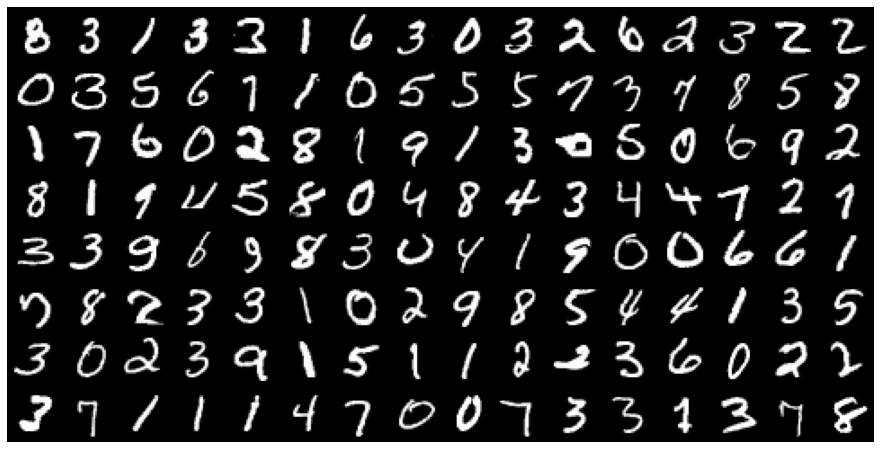

In [ ]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

Now, we will create a simple fully connected Network with two Linear layers and a RELU nonlinear activation:

In [ ]:
class Net(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super().__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    x = x.view(x.size(0), -1) # convert to (# data points, all the rest )
    x = self.fc1(x)
    x = F.relu(x) # rectified linear unit 
    x = self.fc2(x)
    return x

In [ ]:
net = Net(input_size= 3, hidden_size= 5, num_classes= 4)

In [ ]:
net.fc1, net.fc2

(Linear(in_features=3, out_features=5, bias=True),
 Linear(in_features=5, out_features=4, bias=True))

In [ ]:
x = torch.rand(5,3,1,1)
net(x)

tensor([[ 0.1937, -0.4447, -0.3859,  0.3333],
        [ 0.0309, -0.4709, -0.4305,  0.1562],
        [ 0.1561, -0.4098, -0.2764,  0.2453],
        [ 0.2314, -0.3752, -0.1835,  0.3028],
        [ 0.3252, -0.3884, -0.1367,  0.3644]], grad_fn=<AddmmBackward0>)

In [ ]:
images.shape # (num, colors, x, y)

torch.Size([128, 1, 28, 28])

In [ ]:
net = Net(input_size= 1*28*28, hidden_size= 20, num_classes= 10)

In [ ]:
y_pred = net(images)

In [ ]:
y_pred.size()

torch.Size([128, 10])

In [ ]:
images.view(128, -1).shape

torch.Size([128, 784])

### Summary: A useful tool
We often care about how many trianable parameters our model has.
Unfortunately, pytorch doesn't provide a direct function for this. 
But you can install `torchsummary` for this (mimicks the `model.summary()` method in Keras in Tensorflow, which is another ML framework).  

In [ ]:
!pip install torchsummary

In [ ]:
from torchsummary import summary

In [ ]:
model = Net(input_size=input_size, hidden_size=10, num_classes=num_classes).to(device)
summary(model, (1, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]           7,850
            Linear-2                   [-1, 10]             110
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


## Simple Feedforward Neural Network

Let us see how a simple neural network works. We will use Pytorch and the following implementation is coming from [this Pytorch tutorial](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html).

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


We can now define our network. Supposing that the input x is two dimensional (such as an image with 28\*28 pixels), we first need to flatten it into the vector with 28\*28=784 features.

Let's see an example of x with dimensions 2\*2.

In [ ]:
x = torch.randint(0,10,(2,2))
print(x)

# a layer to flatten arrays
lay_flat = nn.Flatten(start_dim=0) # from which dimension on flatten the data
print(lay_flat(x))

tensor([[2, 8],
        [6, 3]])
tensor([2, 8, 6, 3])


Once we have the input ready, we plug it into our network. The network will perform a linear transformation, followed by a non-linear activation function (ReLU in our case). This allows to represent complex data better than using only linear transformation.

Our neural network will map the input to 2 hidden layers and then to a fixed dimension output.


![alt text](https://miro.medium.com/max/357/1*oePAhrm74RNnNEolprmTaQ.png)

In [ ]:
linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), # linear transformation
            nn.ReLU(),  # non-linear transformation
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten() 
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), # linear transformation
            nn.ReLU(),  # non-linear transformation
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x) # flatten the input into a vector
        logits = self.linear_relu_stack(x) # call the sequential function
        return logits # return raw values

We can now construct our model and print its parameters.


In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Let us now test it by using as input a random x. Once we obtain the logits (raw values, we want to transform them into probabilities by using a softmax function.

Once we have that, we can take the argmax or the mazimum probability given by the output of the softmax function. Whichever label had the hughest probability is our result.


torch.Size([1, 28, 28])


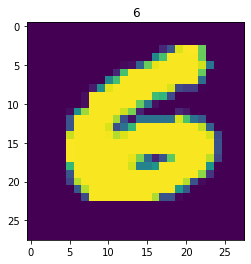

In [ ]:
im, label = train_loader.dataset[0]
imshow(im[0])
title(label)
print(im.shape)

In [ ]:
#X = torch.rand(1, 28, 28, device=device)
X = im
logits = model(X)

In [ ]:
X.shape

torch.Size([1, 28, 28])

In [ ]:
logits.shape

torch.Size([1, 10])

In [ ]:
X = torch.rand(3, 28, 28, device=device)
logits = model(X)

softmax = nn.Softmax(dim=1)

pred_probab = softmax(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([5, 5, 5])


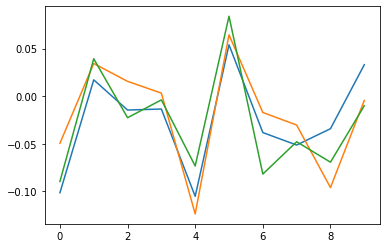

In [ ]:
plot(logits.detach().numpy().T)

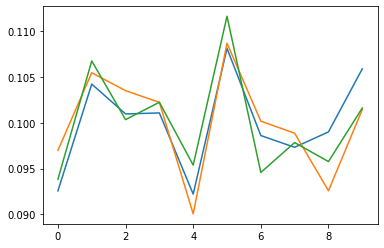

In [ ]:

plot(pred_probab.detach().numpy().T)

## Convolutional Neural Networks

In this section, we will walk through the implementation of a simple convolutional neural network (CNN), LeNet, in PyTorch. This is based on PyTorch tutorials, and a more in-depth discussion can be found [here](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html).

First, we import our dependencies.

![alt text](https://analyticsindiamag.com/wp-content/uploads/2018/01/conv-full-layer.gif)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

To create a CNN, we need two main building blocks in addition to simple feed forward layers and nonlinearities (discussed above). First, we'll need to create convolutions with `torch.nn.Conv2d(...)`. A simple example can be seen here:

In [ ]:
m = nn.Conv2d(in_channels = 2,  
              out_channels = 3,
              kernel_size = (3,3),
              stride = 2)

This layer is randomly initialized, so we don't expect a meaningful output. However, we can test that it works by inputting a simple 2 channel, 3x3 input:

In [ ]:
# shape : (num, in_chan, x,y)
input = torch.randn(10, 2, 15, 15)
output = m(input)
print(output.shape, (15-3+2)/2)

torch.Size([10, 3, 7, 7]) 7.0


We also need to perform pooling operations using `torch.nn.MaxPool2d(...)`. Again, we can generate a simple example to test the layer:

![alt text](https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png)

In [ ]:
p = nn.MaxPool2d(kernel_size = 2,  # Kernel assumed square if single integer
                 stride = 2)

Once the layer is created, we can again test it by applying it to a simple 4x4 input matrix. 

In [ ]:
input = torch.randn(1, 1, 4, 4)
output = p(input)
print(output)

tensor([[[[1.9321, 0.2124],
          [1.0778, 0.6005]]]])


With these layers in hand, we can combine them to create a CNN! We first create a class to define our network. Here, `__init__(...)` defines the layers in the network (and their respective parameters), and `forward(...)` puts those layers in their appropriate order so PyTorch can train the network.

## LeNet

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Yann_LeCun_-_2018_%28cropped%29.jpg/220px-Yann_LeCun_-_2018_%28cropped%29.jpg) ![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ-OuLMZaQO4uCodyv42NSfSeGUgbPdL2mW4imLpPmGn_uS2paxOr8rDDjAObzxwSUkd7M&usqp=CAU)


![alt text](https://d2l.ai/_images/lenet.svg)
<!-- ![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-18-12-52-17.png) -->

### First Implementation
Kind of conpact, but maybe hard to parse.

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        #-- Define the convolution layers.
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        #-- Define three feed-forward layers.
        # Each applies affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 4 * 4, 120)  # 4x4 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        #-- Apply convolution, then relu nonlinearity, then max pooling over a
        # (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # Flatten all dimensions except the batch dimension
        x = torch.flatten(x, 1) 
        # Run flattened `x` through three fully connected layers with 
        # nonlinearities
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create the network, and print its parameters.
net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### Second Implementaion

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        #-- Define the convolution layers.
        self.conv_stack = nn.Sequential(
                    nn.Conv2d(1, 6, 5),
                    nn.ReLU(),
                    nn.MaxPool2d(2),
                    nn.Conv2d(6, 16, 5),
                    nn.ReLU(),
                    nn.MaxPool2d(2),
        )
        self.flatten = nn.Flatten(1)
        #-- Define three feed-forward layers.
        # Each applies affine operation: y = Wx + b
        self.fc_stack = nn.Sequential(
              nn.Linear(16 * 4 * 4, 120), # 4x4 from image dimension (see below)
              nn.ReLU(),
              nn.Linear(120, 84),
              nn.ReLU(),
              nn.Linear(84, 10),
              nn.LogSoftmax(dim=-1),     
        )

    def forward(self, x):
        #-- Apply convolution, then relu nonlinearity, then max pooling over a
        # (2, 2) window
        x = self.conv_stack(x)
        # Flatten all dimensions except the batch dimension
        x = self.flatten(x) 
        # Run flattened `x` through three fully connected layers with 
        # nonlinearities
        x = self.fc_stack(x) 

        return x

# Create the network, and print its parameters.
net = LeNet()
print(net)

LeNet(
  (conv_stack): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc_stack): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
    (5): LogSoftmax(dim=-1)
  )
)


torch.Size([1, 28, 28])


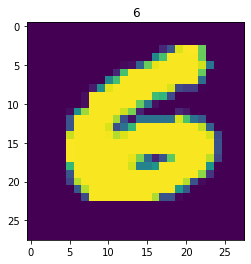

In [ ]:
im, label = train_loader.dataset[0]
imshow(im[0])
title(label)
print(im.shape)

### Tip: use data to figure out dimensions
when you want to pass the data to the FC (nn.Linear) layers you need to flatten the output of the convolutional layers. 
The size of this flattened vector determines the input size of the FC layer. 
Since convolution (without zero padding) and Maxpool change the size of the array, it may be tedious to calculate the size of the output, and hence input size for the FC layer. 
It is easier to simply pass some of your data through the conv layers and check the output size

In [ ]:
conv_out = net.conv_stack(im[newaxis]) # newaxis added as first index: (chan,height,width) --> (1,chan,height,width)
print("shape:", conv_out.shape)
print("flattened size:" ,np.prod(conv_out.shape))

shape: torch.Size([1, 16, 4, 4])
flattened size: 256


In [ ]:
p = list(net.parameters())

In [ ]:
p[-2].shape

torch.Size([10, 84])

We can then put a test input (28x28 matrix) through the network to verify it works:

In [ ]:
# input = torch.randn(1, 1, 32, 32)
im, label = train_loader.dataset[0]
out = net(im[newaxis])
print(out)

tensor([[-2.3146, -2.3472, -2.3898, -2.2820, -2.3242, -2.3491, -2.2795, -2.2025,
         -2.2960, -2.2539]], grad_fn=<LogSoftmaxBackward0>)


To train this network, we first define a loss function as discussed above:

In [ ]:
# criterion = nn.MSELoss()
criterion = nn.NLLLoss()

In [ ]:
label

6

In [ ]:
criterion(out, torch.tensor([label]))

tensor(2.2795, grad_fn=<NllLossBackward0>)

While we can manually perform stochastic gradient descent (SGD) by calculating gradients,

`weight = weight - learning_rate * gradient`

PyTorch provides the `torch.optim` package that allows the user to easily switch between different optimization methods:

In [ ]:
import torch.optim as optim

# Create SGD optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)  

In [ ]:
def fit(epochs, lr, model, train_loader, criterion, opt, validation_loader):
  optimizer = opt
  train_losses = []
  training_loss = []
  validation_loss = []
  accuracy = []

  for epoch in range(epochs):
    training_loss = []
    for index, (data, labels) in enumerate(train_loader):
      # Giving data to cuda
      data = data.reshape(data.size(0), -1).to(device=device)
      labels = labels.to(device=device)
      # forward pass
      y_hat = model(data)
      loss = criterion(y_hat, labels)
      training_loss.append(loss)

      # backward pass
      loss.backward()

      # gradient descent
      optimizer.step()
      optimizer.zero_grad()
    avg_validation_loss = torch.stack(get_validation_loss(validation_loader, criterion, model)).mean().item()
    avg_training_loss = torch.stack(training_loss).mean().item()
    train_losses.append(avg_training_loss)
    validation_loss.append(avg_validation_loss)
    print (f'Epoch [{epoch+1}/{epochs}]: The training loss is {avg_training_loss:.4f} & validation loss is {avg_validation_loss:.4f}')
  return train_losses, validation_loss


We will also create a function which will compute the validation loss from the validation set:

In [ ]:
@torch.no_grad()
def get_validation_loss(validation_loader, criterion, model):
  validation_loss = []
  for index, (data, labels) in enumerate(validation_loader):
     # Giving data to cuda
      data = data.reshape(data.size(0), -1).to(device=device)
      labels = labels.to(device=device)
      # forward pass
      y_hat = model(data)
      loss = criterion(y_hat, labels)
      validation_loss.append(loss)
  return validation_loss

Below calls the fit function using our hyperparameters, model, the Cross Entropy Loss, and Adam as the optimizer:

In [ ]:
train_loss, val_loss = fit(num_epochs, eta, model, train_loader, 
                           nn.CrossEntropyLoss(), torch.optim.Adam(model.parameters(), lr=eta), 
                           validation_loader)

Epoch [1/20]: The training loss is 0.8123 & validation loss is 0.4225
Epoch [2/20]: The training loss is 0.3488 & validation loss is 0.3248
Epoch [3/20]: The training loss is 0.3009 & validation loss is 0.3004
Epoch [4/20]: The training loss is 0.2795 & validation loss is 0.2825
Epoch [5/20]: The training loss is 0.2662 & validation loss is 0.2849
Epoch [6/20]: The training loss is 0.2572 & validation loss is 0.2698


KeyboardInterrupt: ignored

We then create a training loop by generating outputs, calculating loss, backpropagating, and updating weights. Here, we generate a random example target to optimize against:

In [ ]:
# Create example target
target = torch.randn(10)
# Make it the same shape as output
target = target.view(1, -1)  

# Begin training loop
# Zero the gradient buffers
optimizer.zero_grad()   
# Generate outputs
output = net(input)
# Calculate loss
loss = criterion(output, target)
# Backpropagate loss
loss.backward()
# Perform update
optimizer.step()

print(loss)

tensor(1.7320, grad_fn=<MseLossBackward0>)


In practice, we would feed this CNN a labelled dataset (MNIST, for example), and iterate through it with the training loop above. 